In [56]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import matplotlib.transforms as mtransforms

# HV function 
def heav(X):
    if X <= 0:
        return 0
    elif X>0:
        return 1

# fixed delayed slope
def decimal_range(start, stop, increment):
    while start < stop: # and not math.isclose(start, stop): Py>3.5
        yield start
        start += increment

# SSA function for strain with cdc14 endocycle

In [57]:

def run_():
   
    
    """
    Model parameters
    """
    mu =0.0077
    cell_size=0.65
    f_mean = 0.55
    f_cv = 0.1
    crit_size = 0.60
    crit_size_cv = 0.1    
    spn_m = 0.07
    spn_cv = 0.03
    spoc_m = 0.07
    spoc_cv = 0.03
    S0_log = np.random.lognormal(np.log(crit_size),crit_size_cv,1)[0]


    """
    Propensity values
    """
    param_dict = {"cln3":1,
                 "whi5":1,
                 "sbf":1,
                 "cln2":1,
                 "mbf":1,
                 "clb5":1,
                 "clb2G":1,
                 "cdc5":1,
                 "mcm1":1,
                 "clb2M":1,
                 "sac":1,
                 "cdc20":1,
                 "spoc":1,
                 "cdc14":1,
                 "swi5":1,
                 "cdh1":1,
                 "sic1":1,
                 "nrm1":1}
    
    """
    Initial state G1
    """
    
    cln3=0
    whi5=1
    sbf=0
    cln2=0
    mbf=0
    clb5=0
    ori=0
    mcm1=0
    clb2G=0
    clb2M=0
    cdc20=0
    cdc5=0
    cdc14=0
    swi5=0
    cdh1=1
    sic1=1
    nrm1=0
    sac = 0
    spoc= 0
    spn_progress = 0
    spoc_progress = 0
    time_init = 0
    divide_status = ""
    
   
    init_state = [cln3,whi5,sbf,cln2,mbf,clb5,ori,clb2G,cdc5,mcm1,clb2M,sac,cdc20,spoc,cdc14,swi5,cdh1,sic1,nrm1,
                  time_init,cell_size,S0_log,divide_status,spn_progress,spoc_progress]
    
    sim_list = [init_state]

    
    tr_ = 500
    sac_event = [] # to track sac checkpoint event
    
    #
    clb_nd=0
    cdc14_endo_start = 300
    
    for j in range(tr_):

        """
        Weights & Rules
        """

        k1 = 1 
        k2 = 1 
        k3 = 1 
        k4 = 1 
        k5 = 3 
        k6 = 1 
        k7 = 1 
        k8 = 3 
        k9 = 2 
        k10 = 1 
        k11 = 1 
        k12 = 1 
        k13 = 2 
        k14 = 2 
        k15 = 1 
        k16 = 3 

        
     
        cln3_sum = (cell_size >= S0_log)
        whi5_sum = 0.5 + k11*cdc14 - k1*cln3 - k4*cln2
        sbf_sum =  -0.2 - (k2+2)*whi5  + k6*clb5 + k4*cln2 - (k15+3)*clb2G + k4*cln3
        cln2_sum = -1 + k3*sbf + 0.6*mbf
        mbf_sum  = -0.5 + (k6+2)*clb5 + (k4+1)*cln2 - (k15+3)*clb2G + 0.6*cln3 - (k16)*nrm1 
        clb5_sum = -0.5 -(k14/8)*sic1 -k9*cdc20 + k5*mbf + 0.8*sbf 

        clb2G_sum = 0.5 - k13*cdh1 - (k14/4)*sic1 + clb_nd
        clb2M_sum =  -0.5 + k7*mcm1 - k9*cdc20 + clb_nd

        mcm1_sum = -0.5 + k8*clb2M + k15*clb2G
        cdc5_sum = -0.5 + k8*clb2M - k13*cdh1 + (k15+2)*clb2G
        cdc20_sum =  -0.5 - sac + k7*mcm1

        cdc14_sum = -0.5 + k10*cdc5 - spoc - sac - clb2M 

        swi5_sum =  -1 + k11*cdc14 +k7*mcm1 
        cdh1_sum = 0.5 + (2+k11)*cdc14 - k8*clb2M - k6*clb5 - k4*cln2 - k15*clb2G
        sic1_sum = 0.5 + k12*swi5 - k8*clb2M - k6*clb5 - k4*cln2 - k15*clb2G 
        nrm1_sum = 0.5 - k13*cdh1 + mbf

            
            
  

        """
        Binarizing the sum variables by Heaviside function
        """
        cln3_new = heav(cln3_sum)
        whi5_new = heav(whi5_sum)
        sbf_new = heav(sbf_sum)
        cln2_new = heav(cln2_sum)
        mbf_new = heav(mbf_sum)
        clb5_new = heav(clb5_sum)
        mcm1_new = heav(mcm1_sum)
        clb2M_new = heav(clb2M_sum)
        cdc20_new = heav(cdc20_sum) 
        cdc5_new = heav(cdc5_sum)
        cdc14_new = heav(cdc14_sum) 
        swi5_new = heav(swi5_sum)
        cdh1_new = heav(cdh1_sum)
        sic1_new = heav(sic1_sum)
        clb2G_new = heav(clb2G_sum)
        nrm1_new = heav(nrm1_sum)



        """
        Which protein is changed ?
        """

        cln3_update = cln3_new - cln3
        whi5_update = whi5_new - whi5
        sbf_update =  sbf_new - sbf
        cln2_update = cln2_new - cln2
        mbf_update  = mbf_new - mbf
        clb5_update = clb5_new - clb5
        mcm1_update = mcm1_new - mcm1
        clb2M_update = clb2M_new - clb2M
        cdc20_update = cdc20_new - cdc20
        cdc5_update = cdc5_new - cdc5
        cdc14_update = cdc14_new - cdc14
        swi5_update = swi5_new - swi5
        cdh1_update = cdh1_new - cdh1
        sic1_update = sic1_new - sic1
        clb2G_update = clb2G_new - clb2G
        nrm1_update = nrm1_new - nrm1


        """
        Generating propensity ranges
        """

        x1 = abs(cln3_update)*param_dict["cln3"]
        x2 = x1 + abs(whi5_update)*param_dict["whi5"]
        x3 = x2 + abs(sbf_update)*param_dict["sbf"]
        x4 = x3 + abs(cln2_update)*param_dict["cln2"]
        x5 = x4 + abs(mbf_update)*param_dict["mbf"]
        x6 = x5 + abs(clb5_update)*param_dict["clb5"]
        x7 = x6 + abs(mcm1_update)*param_dict["mcm1"]
        x8 = x7 + abs(clb2M_update)*param_dict["clb2M"]
        x9 = x8 + abs(cdc20_update)*param_dict["cdc20"]
        x10 = x9 + abs(cdc5_update)*param_dict["cdc5"]
        x11 = x10 + abs(cdc14_update)*param_dict["cdc14"]
        x12 = x11 + abs(swi5_update)*param_dict["swi5"]
        x13 = x12 + abs(cdh1_update)*param_dict["cdh1"]
        x14 = x13 + abs(sic1_update)*param_dict["sic1"]
        x15 = x14 + abs(clb2G_update)*param_dict["clb2G"]
        x16 = x15 + abs(nrm1_update)*param_dict["nrm1"]

        if x16 == 0:
            x17 = 1
        else:
            x17 = x16


        """
        Which protein will be updated ?
        """
        sel = random.uniform(0,1)*x17

        y1 = (sel<=x1)
        y2 = (sel>x1)&(sel<=x2)
        y3 = (sel>x2)&(sel<=x3)
        y4 = (sel>x3)&(sel<=x4)
        y5 = (sel>x4)&(sel<=x5)
        y6 = (sel>x5)&(sel<=x6)
        y7 = (sel>x6)&(sel<=x7)
        y8 = (sel>x7)&(sel<=x8)
        y9 = (sel>x8)&(sel<=x9)
        y10 = (sel>x9)&(sel<=x10)
        y11 = (sel>x10)&(sel<=x11)
        y12 = (sel>x11)&(sel<=x12)
        y13 = (sel>x12)&(sel<=x13)
        y14 = (sel>x13)&(sel<=x14)
        y15 = (sel>x14)&(sel<=x15)
        y16 = (sel>x15)&(sel<=x16)
        y17 = (sel>x16)


        """
        Updating time based on the type of chosen protein
        """
        check_y = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17]
        index_true = check_y.index(True)
        
        if index_true == 16:
            #index_true == 16 means there is no variable changes
            delt = np.random.gamma(5,0.3)

        else:
            
            node_list =  ['cln3', 'whi5', 'sbf', 'cln2', 'mbf', 'clb5', 'mcm1', 'clb2M', 'cdc20', 'cdc5', 'cdc14', 'swi5', 'cdh1', 'sic1', 'clb2G', 'nrm1']
            update_protein = node_list[index_true]
            fast = ["whi5","mbf","sbf","swi5","cdh1","cdc5","mcm1"]
            #cln2,clb5,clb2,cdc20,cdc14,nrm1,sic1,cln3 = slow

            if update_protein in fast:
                delt = np.random.gamma(2,0.3)
            else:
                delt = np.random.gamma(3,0.3)
        
          
        # Adding delay to strain with cdc14 endocycle event    
        if time_init >= cdc14_endo_start:
            
            if (cdh1 == 0 and cdh1_new == 1 and y13 == 1):
                delt = np.random.gamma(cdh1_delay_ON,cdh1_delay_cv_ON)
            if (cdc5 == 1 and cdc5_new == 0 and y10 == 1):
                delt = np.random.gamma(cdc5_delay,cdc5_delay_cv)
                
        time_init = time_init + delt


        """
        Updating size
        """ 
        if(clb2G == 1 and clb2G_new+clb_nd == 0 and y15 == 1):
            
            f = np.random.lognormal(np.log(f_mean),f_cv, 1)[0]
            S0_log  = np.random.lognormal(np.log(crit_size),crit_size_cv,1)[0]
            cell_size = cell_size*math.exp(mu*delt) * f
            divide_status = "divided !!!"

        else:
            cell_size = cell_size*math.exp(mu*delt)
            divide_status = ""



        """
        Updating protein activity
        """

        cln3 = cln3 + cln3_update*y1
        whi5 = whi5 + whi5_update*y2
        sbf =  sbf + sbf_update*y3
        cln2 = cln2 + cln2_update*y4
        mbf =  mbf + mbf_update*y5
        clb5 = clb5 + clb5_update*y6
        mcm1 = mcm1 + mcm1_update*y7
        clb2M = clb2M + clb2M_update *y8
        cdc20 = cdc20 + cdc20_update*y9
        cdc5 = cdc5 + cdc5_update*y10
        cdc14 = cdc14 + cdc14_update*y11
        swi5 = swi5 + swi5_update*y12
        cdh1 = cdh1 + cdh1_update*y13
        sic1 = sic1 + sic1_update*y14
        clb2G = clb2G + clb2G_update*y15
        nrm1 = nrm1 + nrm1_update*y16
        
        
        """
        Forcing cln3 and whi5 to turn on and off based on cell size
        """
 
        if cell_size < S0_log :
            cln3,whi5 = 0,1
        else:
            cln3,whi5 = 1,0
 

        """
        Checking when ORI will be licensed and SAC chekpoint will turn ON
        """
    
        # DNA start
        if (clb5 == 1 or clb2M == 1 or clb2G == 1 or clb_nd >0):
            ori = 1
        else:
            ori = 0

        # Spindle Assemly Checkpoint
        if (ori == 1 and spn_progress < 1):
            sac=1
        else:
            sac=0

        ## spindle assembly progress: start when Clb2M is ON
        if(clb2M == 1 and sac == 1):
            
            num =  np.random.lognormal(np.log(spn_m),spn_cv,1)[0]
            spn_progress += num
            
            if spn_progress >= 1:
                spn_progress = 1
         
        
        """
        Checking when SPoC checkpoint will be initiated.
        """
    
        # SPoC Checkpoint
        if j >= 10:
            t_previous = sac_event[j-2]
            t_current = sac_event[j-1]

            del_sac = t_current-t_previous
        
        if (cdc20 == 1 and del_sac == -1 and spoc_progress < 1):
            spoc = 1
        elif spoc_progress >= 1:
            spoc = 0
        
                
        ## SPoC progress
        if(cdc20 == 1 and spoc == 1):
            num = np.random.lognormal(np.log(spoc_m),spoc_cv,1)[0]
            spoc_progress += num
            if spoc_progress >= 1:
                spoc_progress = 1
                
                
           
        """
        Resetting progress variables when the progress is done,e.g., spindle progress reset back to zero when anaphase start (cdc20 = 1) 
        """
    
        if cdc20 == 1 or clb_nd > 0:
            spn_progress = 0
            sac = 0 
        
        if cdc14 == 1 or clb_nd > 0:
            spoc_progress = 0
            spoc = 0
     
     
        
        if time_init >= cdc14_endo_start:
            
            mu=0.0046
            clb_nd=0.5
            
            cdc5_delay = 15
            cdc5_delay_cv = 1.5
            
            cdh1_delay_ON = 15
            cdh1_delay_cv_ON = 1.5
            

    
        res_ = [cln3,whi5,sbf,cln2,mbf,clb5,ori,clb2G+clb_nd,cdc5,mcm1,clb2M+clb_nd,sac,cdc20,spoc,cdc14,swi5,cdh1,sic1,nrm1,
                time_init,cell_size,S0_log,divide_status,spn_progress,spoc_progress]   
            
        sim_list.append(res_)
        sac_event.append(sac)
        
    return sim_list

In [58]:
dff = run_()
node_name = ["cln3","whi5","sbf","cln2", "mbf","clb5","ori", "clb2G", "cdc5","mcm1","clb2M","sac", "cdc20","spoc","cdc14","swi5","cdh1","sic1","nrm1"]
df_sim = pd.DataFrame(dff,columns=node_name+["time","cell_size","critical_size","divide","SPN","SPOC"])
#cm = sns.light_palette("green", as_cmap=True)
#df_sim.style.background_gradient(cmap=cm)

In [59]:
cdh1_p = np.array(df_sim["cdh1"])
clb2G_p = np.array(df_sim["clb2G"])
cdc5_p = np.array(df_sim["cdc5"])
cdc14_p = np.array(df_sim["cdc14"])
ts = np.array(df_sim["time"])
cs = np.array(df_sim["cell_size"])

In [60]:
# plot protein activities + adjust slope from delay

In [61]:
dict_ = {"Cdh1":cdh1_p,"Clb2G":clb2G_p,"Cdc5":cdc5_p,"Cdc14":cdc14_p}
activities_list = []
for i in dict_.keys():
    dat = pd.DataFrame(dict_[i],columns=["value"])
    dat["index"] = i
    dat["ts"] = ts
    activities_list.append(dat)
    
dat_cat = pd.concat(activities_list)
table = pd.pivot_table(dat_cat, values='value', index="index",columns="ts")

In [62]:
time_list = []
ts_col = table.columns.tolist()
for ts_df in range(len(ts_col)-1):
    
    old_index = ts_df
    new_index = ts_df+1
    
    old_c = ts_col[old_index]
    new_c = ts_col[new_index]
  
    int_  = new_c - old_c
    if int_ >= 3:
        time_list.append(ts_df)
    

In [63]:
df_list = []
for _ in time_list:
    
    start_time = _
    end_time = _ + 1
    
    st_real = ts_col[start_time]
    end_real = ts_col[end_time]
    
    #add time
    add_time = [in_time for in_time in decimal_range(st_real,end_real,1e-2)]
    df_p = pd.concat([table.iloc[:,_]]*len(add_time),axis=1)
    df_p.columns = add_time
    df_list.append(df_p)
    

In [64]:
df_add = pd.concat(df_list,axis=1)
df_add_1 = pd.concat([table,df_add],axis=1)
df_plot = df_add_1.reset_index().melt(id_vars="index")
cs_df=pd.DataFrame(cs,columns=["value"])
cs_df["variable"] = ts
cs_df["index"] = "cell_size"
all_df = pd.concat([df_plot,cs_df]).reset_index().iloc[:,1:]

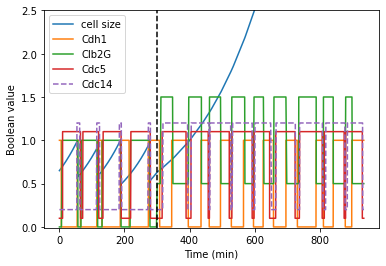

In [65]:
def line_(X):
    FD = all_df.query("index == @X").sort_values(by="variable")
    FD2 = FD.variable
    FD3 = FD.value
    return [FD2,FD3]

plt.plot(line_("cell_size")[0],line_("cell_size")[1], label ='cell size')
plt.plot(line_("Cdh1")[0],line_("Cdh1")[1], label ='Cdh1')
plt.plot(line_("Clb2G")[0],line_("Clb2G")[1], label ="Clb2G")
plt.plot(line_("Cdc5")[0],line_("Cdc5")[1]+0.1, label ='Cdc5')
plt.plot(line_("Cdc14")[0],line_("Cdc14")[1]+0.2, label ='Cdc14',linestyle='--')

plt.ylim(-0.01,2.5)
plt.axvline(x=300,color='black',linestyle="--")
plt.legend(loc="upper left")
plt.xlabel("Time (min)")
plt.ylabel("Boolean value")

plt.show()
